In [17]:
#Importing packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [31]:
#Importing iris dataset and setting seed
np.random.seed(3)
iris = load_iris()
#df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  #columns= iris['feature_names'] + ['flower'])
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

In [32]:
#Checking data
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
#Fixing the column names
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'flower']

In [34]:
#Shuffle the data and split it into x and y, standardising x since KNN is sensitive
# to size.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = shuffle(df)
x = df.iloc[:, :-1]
print(x.head())
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
y = df.iloc[:,-1]
print(x.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
47                4.6               3.2                1.4               0.2
3                 4.6               3.1                1.5               0.2
31                5.4               3.4                1.5               0.4
25                5.0               3.0                1.6               0.2
15                5.7               4.4                1.5               0.4
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.506521          0.337848          -1.341272         -1.312977
1          -1.506521          0.106445          -1.284407         -1.312977
2          -0.537178          0.800654          -1.284407         -1.050031
3          -1.021849         -0.124958          -1.227541         -1.312977
4          -0.173674          3.114684          -1.284407         -1.050031


In [35]:
#Now we split our data into a training and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, test_size=0.2)

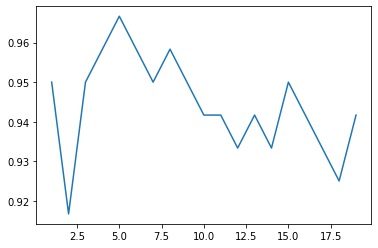

In [36]:
#We now perform k-fold cross validation to find the optimal k
k_vals = np.arange(1, 20)
validation_error = [cross_val_score(KNeighborsClassifier(n_neighbors=k), x_train, y_train, cv=5)
                for k in k_vals]
plt.plot(k_vals, [val.mean() for val in validation_error])

In [30]:
#We see that k=5 has the highest score while being as simple as possible.
#Our test error is then
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9666666666666667

In [9]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

k_vals = np.arange(1, 21)
validation_error = []
random.seed(10)
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    
    
    # We will plot the decision boundary in the space of
    # sepal length and petal length. We will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    model.fit(x_train[["petal length (cm)", "petal width (cm)"]], y_train)
    
    h = .02 #step size in mesh
    plot_x = np.array(x_train["petal length (cm)"])
    plot_y = np.array(x_train["petal width (cm)"])
    x_min, x_max = float(plot_x.min() - 1), float(plot_x.max() + 1)
    y_min, y_max = float(plot_y.min() - 1), float(plot_y.max() + 1)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(plot_x, plot_y, c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (k))
    plt.show()

<ipython-input-9-d7341ec2fe2a>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 101     Iris-virginica
145     Iris-virginica
103     Iris-virginica
100     Iris-virginica
1          Iris-setosa
            ...       
133     Iris-virginica
60     Iris-versicolor
88     Iris-versicolor
114     Iris-virginica
30         Iris-setosa
Name: flower, Length: 120, dtype: object

TypeError: iteration over a 0-d array

<Figure size 432x288 with 1 Axes>